# Q3. Bank Churn Classification Problem
## Dataset Description:
Banking is one of those traditional industries that has gone through a steady transformation over the past few decades. Yet, many banks today with a sizeable customer base are hoping to gain a competitive edge but have not tapped into the vast amounts of data they have, especially in solving one of the most acknowledged problems – customer churn (i.e., a customer leaving the bank). It is advantageous to banks to know what leads a client to leave the bank. Banks often use the customer churn rate as one of their key business metrics because the cost of retaining existing customers is far less than acquiring new ones, and meanwhile increasing customer retention can greatly increase profits.  
Churn prevention allows companies to develop different programs such as loyalty and retention programs to keep as many customers as possible. Following are the attributes of the dataset we will be working with. 
 

- RowNumber (continuous) — corresponds to the record (row) number and has no effect on the output. 
 

- CustomerId  (categorical)— contains random values and has no effect on customer leaving the bank. 
 

- Surname  (categorical)— the surname of a customer has no impact on their decision to leave the bank 
 

- CreditScore  (continuous) — can influence customer churn, since a customer with a higher credit score is less likely to leave the bank. 
 

- Geography (categorical) — a customer’s location can affect their decision to leave the bank. 
 

- Gender (categorical) — it’s interesting to explore whether gender plays a role in a customer leaving the bank. 
 

- Age (continuous) — this is certainly relevant, since older customers are less likely to leave their bank than younger ones. 
 

- Tenure (continuous) — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank. 
 

- Balance (continuous) — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances. 
 

- NumOfProducts (continuous) — refers to the number of products that a customer has purchased through the bank. 
 

- HasCrCard (categorical) — denotes whether a customer has a credit card. This column is also relevant since people with a credit card are less likely to leave the bank. 
 

- IsActiveMember (categorical) — active customers are less likely to leave the bank. 
 

- EstimatedSalary (continuous) — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries. 
 

- Exited (Categorical) — whether or not the customer left the bank. (Target variable) 

# Import all the necessary libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Scaling & splitting Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Sampling library
from imblearn.over_sampling import SMOTE

#Evaluation Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <BankChurn.csv> as a pandas dataframe using the `pd.read_csv()` function which returns a dataframe , store this value in a variable named `df`.

In [2]:
df = pd.read_csv('churn.csv')

2. The resulting dataframe should have the shape (10000,14) indicating that there are 10000 instances and 14 columns. 

In [3]:
print(df.shape)
df.describe()

(10000, 14)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


3. In this dataframe, currently you have 9 features which are the following: RowNumber, CustomerID, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary. Using the `pandas.dataframe.drop` function to drop the RowNumber, CustomerID and Surname columns.

In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

4. Using the `pandas.isnull()` function check if there are any missing values in the dataframe and report this value (i.e., the number of missing values per column of the dataframe).

In [5]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

5. Your task is to use feature columns to predict the target column (which is categorical in our case). This can be cast as a classification problem. 

6. Create a dataframe `X` of features (by dropping the ‘Exited’ column from the original dataframe). Create a Pandas Series object of targets `Y` (by only considering the ‘Exited’ column from the original dataframe). Moving forward, we will be working with `X` and `Y`.

In [6]:
X = df.drop('Exited', axis=1)
y = df['Exited']

### ii. Data Visualisation
1. Visualize the distribution of the ‘Age’ and ‘CreditScore’ column using the `matplotlib.pyplot.hist` function as two separate plots. Label the x-axis and the y-axis along with giving the plot a title and assign a bin size of 7.

Answer the following questions in your solution document:
- What are the respective mean values of these two features (use the `pandas.DataFrame.mean()` function)?
- What is the respective standard deviation of these two features (use the `pandas.DataFrame.std()` function)? 

Age Mean: 38.9218
Age Std Deviation: 10.487806451704609


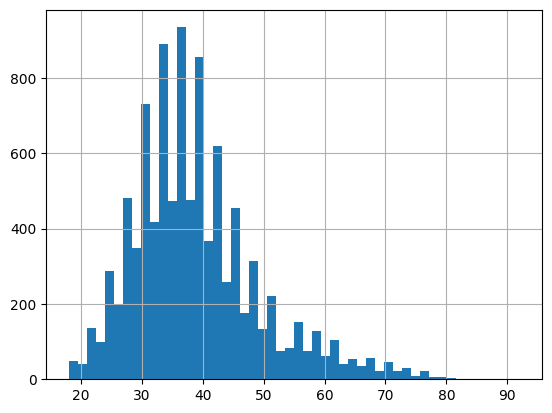

In [7]:
X['Age'].hist(bins=50)
print(f'Age Mean: {X['Age'].mean()}')
print(f'Age Std Deviation: {X['Age'].std()}')

CreditScore Mean: 650.5288
CreditScore Std Deviation: 96.65329873613035


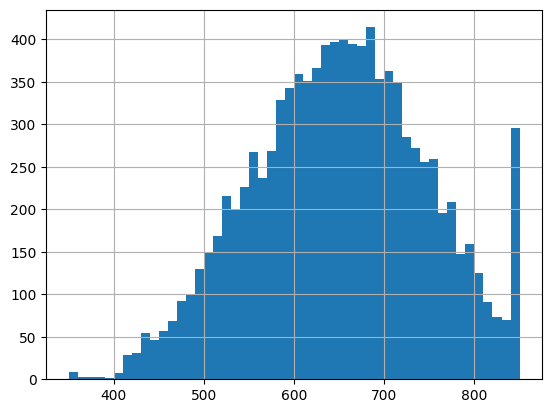

In [8]:
X['CreditScore'].hist(bins=50)
print(f'CreditScore Mean: {X['CreditScore'].mean()}')
print(f'CreditScore Std Deviation: {X['CreditScore'].std()}')

2. **Only for this question** use the dataframe consisting of the target variable (initialized as `df`). Using matplotlib visualize the number of males and females in each country who are active members and not active members. (Visualize this using a barchart. You will need to use the ‘Gender’, ‘Geography’ and ‘IsActiveMember’ features for this question). Visualize these graphs on two separate plots with respect to their active status. To create a barchart using matplotlib use the `matplotlib.pyplot.bar()` function. Also label the x-axis, y-axis and give the plots a title. 

Answer the following questions in your solution document:
- How many males are from France and are active members?
- How many females are from Spain and are active members?
- How many males are from France or Germany who are not active members?

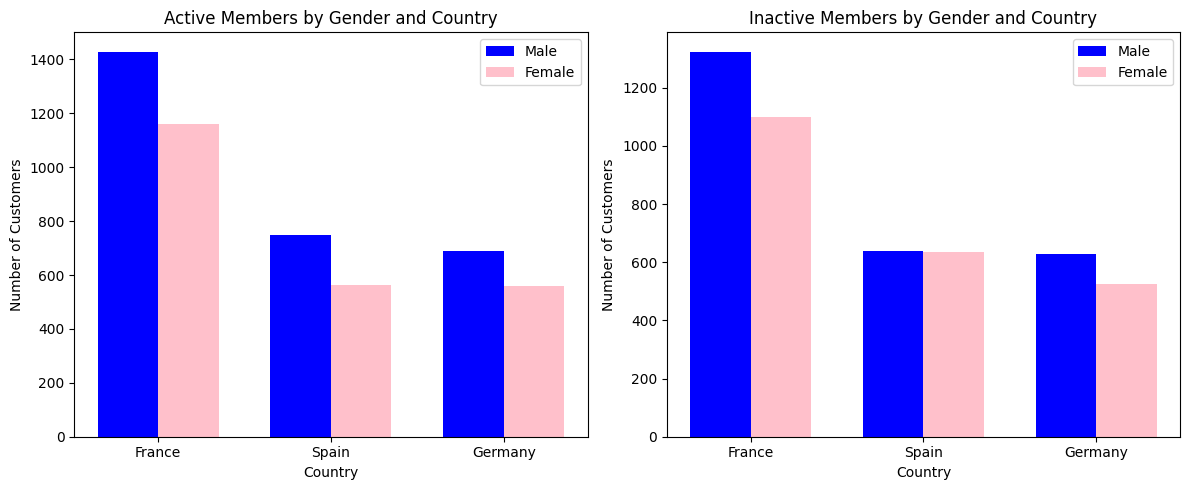

Number of active male members from France: 1429
Number of active female members from Spain: 563
Number of inactive male members from France or Germany: 1951


In [9]:
# Create two separate plots for active and inactive members
plt.figure(figsize=(12, 5))

# Plot for Active Members (IsActiveMember == 1)
plt.subplot(1, 2, 1)
active_members = df[df['IsActiveMember'] == 1]
male_counts = active_members[active_members['Gender'] == 'Male']['Geography'].value_counts()
female_counts = active_members[active_members['Gender'] == 'Female']['Geography'].value_counts()

x = np.arange(len(male_counts))
width = 0.35

plt.bar(x - width/2, male_counts, width, label='Male', color='blue')
plt.bar(x + width/2, female_counts, width, label='Female', color='pink')

plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Active Members by Gender and Country')
plt.xticks(x, male_counts.index)
plt.legend()

# Plot for Inactive Members (IsActiveMember == 0)
plt.subplot(1, 2, 2)
inactive_members = df[df['IsActiveMember'] == 0]
male_counts = inactive_members[inactive_members['Gender'] == 'Male']['Geography'].value_counts()
female_counts = inactive_members[inactive_members['Gender'] == 'Female']['Geography'].value_counts()

x = np.arange(len(male_counts))
width = 0.35

plt.bar(x - width/2, male_counts, width, label='Male', color='blue')
plt.bar(x + width/2, female_counts, width, label='Female', color='pink')

plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Inactive Members by Gender and Country')
plt.xticks(x, male_counts.index)
plt.legend()

plt.tight_layout()
plt.show()

# Answer the questions
active_french_males = len(df[(df['IsActiveMember'] == 1) & 
                           (df['Gender'] == 'Male') & 
                           (df['Geography'] == 'France')])

active_spanish_females = len(df[(df['IsActiveMember'] == 1) & 
                              (df['Gender'] == 'Female') & 
                              (df['Geography'] == 'Spain')])

inactive_french_german_males = len(df[(df['IsActiveMember'] == 0) & 
                                    (df['Gender'] == 'Male') & 
                                    (df['Geography'].isin(['France', 'Germany']))])

print(f"Number of active male members from France: {active_french_males}")
print(f"Number of active female members from Spain: {active_spanish_females}")
print(f"Number of inactive male members from France or Germany: {inactive_french_german_males}")

3. Using the target variable in `Y` plot a bar chart showing the distribution of the ‘Exited’ column (To create a barchart using matplotlib use the `matplotlib.pyplot.bar()` function). 

Answer the following question in your solution document:
- What can be said about this distribution (specifically keeping in mind this distribution represents the target variable) will this have an impact on the results of the classification model? 

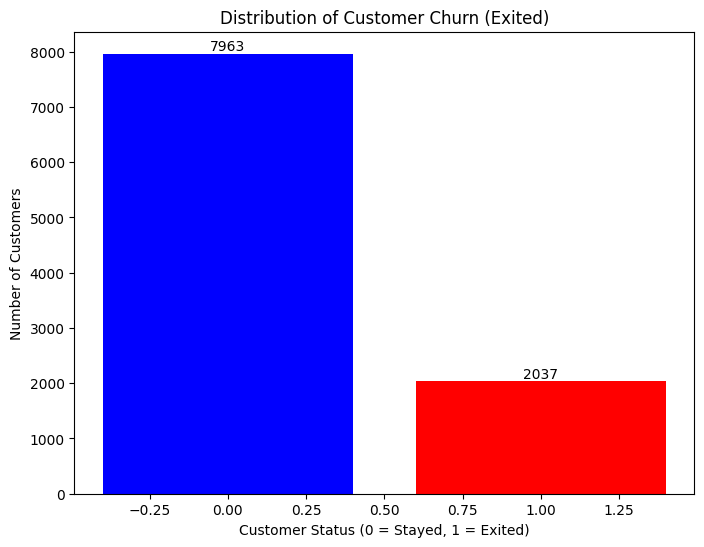

Customers who stayed: 79.63%
Customers who exited: 20.37%


In [10]:
# Create bar chart of the target variable distribution
plt.figure(figsize=(8, 6))
class_counts = y.value_counts()

plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.title('Distribution of Customer Churn (Exited)')
plt.xlabel('Customer Status (0 = Stayed, 1 = Exited)')
plt.ylabel('Number of Customers')

# Add count labels on top of each bar
for i, v in enumerate(class_counts.values):
    plt.text(class_counts.index[i], v, str(v), ha='center', va='bottom')

plt.show()

# Calculate the percentage of each class
total_customers = len(y)
stayed_percent = (class_counts[0] / total_customers) * 100
exited_percent = (class_counts[1] / total_customers) * 100

print(f"Customers who stayed: {stayed_percent:.2f}%")
print(f"Customers who exited: {exited_percent:.2f}%")

4. So far you should have successfully been able to load, preprocess and visualize your data. Now, use the `pd.get_dummies()` function to convert categorical data into dummy variables (‘Gender’ and ‘Geography’).
**(Perform this only on `X`)**. 

Asnwer the following question in your solution document:
- What is the shape of X?

In [11]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
X.shape

(10000, 11)

### iii. Data Splitting
1. Split data into training and test sets using the sklearn `train_test_split()` function in a **80:20** ratio. The result of your data split should be `X_train`, `X_test`, `y_train`, `y_test`. (Respectively your training features, testing features, training targets and testing target arrays).

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### iv. Data Scaling
1. Employ the `MinMaxScaler` function on the continuous attributes in `X_train`. Employ the `fit_transform()` function of the scaler to retrieve the new (scaled) version of the training data (i.e., `fit_transform()` should be run on `X_train`). Store the result in `X_train` again. 


In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

2. Scale the `X_test` data using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into `X_test`.  At the end of this step, you must have `X_train`, `X_test`, scaled according to the `MinMaxScaler`.

In [14]:
X_test = scaler.transform(X_test)

### c. Modelling
### i. Modeling (Model Instantiation / Training) using Logistic Regression classifier 
1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label/Name this model as ‘model_1_lr’

In [15]:
model_1_lr = LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled `X_train`, `y_train` data.

In [16]:
model_1_lr.fit(X_train, y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_lr`.

In [17]:
y_pred_lr = model_1_lr.predict(X_test)

4. Employ the `accuracy_score()` function by using the `y_pred_lr` and `y_test` variables as the functions parameters and print the accuracy of the Logistic Regression model   

In [18]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### ii. Modeling (Model Instantiation / Training) using Support Vector Machine Classifier 

1. Employ the Support Vector Machine (SVM) classifier from sklearn and instantiate the model. Label/Name this model as `model_2_svm`

In [19]:
model_2_svm = SVC(probability=True)

2. Once instantiated, `fit()` the model using the scaled `X_train`, `y_train` data.

In [20]:
model_2_svm.fit(X_train, y_train)

SVC(probability=True)

3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_svm`. 

In [21]:
y_pred_svm = model_2_svm.predict(X_test)

4. Employ the `accuracy_score` function (`sklearn.metrics.accuracy()` function) by using the `y_pred_svm` and `y_test` variables as the functions parameters and print the accuracy of the SVM model. 

In [22]:
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.85      0.30      0.44       393

    accuracy                           0.85      2000
   macro avg       0.85      0.64      0.68      2000
weighted avg       0.85      0.85      0.82      2000



1. Employ Synthetic Minority Oversampling on X_train and y_train. To use SMOTE you will have to install the imbalanced-learn library, this can either be done by executing the following command `pip install -U imbalanced-learn` for pip or the `conda install -c conda-forage imbalanced-learn` command for the Anaconda Cloud platform. (For more information click the following link: https://imbalanced-learn.org/stable/install.html).  
We have imported the `SMOTE` function from the `imblearn.over_sampling`. Use the `smote.refit_resample()` function on `X_train` and `y_train` using its default parameters. Store them in `X_train_smote`, `y_train_smote`.
Be careful to employ SMOTE ONLY on the training data and not on the full dataset because that can cause inadvertent “data leakage” (please see: https://arxiv.org/pdf/2107.00079.pdf for details) . 

In [23]:
model_1_smote = SMOTE()
X_train_smote, y_train_smote = model_1_smote.fit_resample(X_train, y_train)

2. Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label/Name this model as `model_3_smote_lr`

In [24]:
model_3_smote_lr = LogisticRegression()

3. Once instantiated, `fit()` the model using the balanced `X_train_smote`, `y_train_smote` data.

In [25]:
model_3_smote_lr.fit(X_train_smote, y_train_smote)

LogisticRegression()

4. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_smote_lr`. 

In [26]:
y_pred_smote_lr = model_3_smote_lr.predict(X_test)

5. Employ the `accuracy_score` function by using the `y_pred_smote_lr` and `y_test` variables as the functions parameters and print the accuracy of the new Logistic Regression model.

Answer the following question in your solution document:
- What is your initial observation of the accuracy of model_3_smote_lr vs. accuracy of model_1_lr? What could be the reasoning for (any possible) change in accuracy?

In [27]:
accuracy = accuracy_score(y_test, y_pred_smote_lr)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_smote_lr))

Accuracy: 0.728
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.70      0.50       393

    accuracy                           0.73      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.73      0.75      2000



### iv. Modeling SVM on a balanced dataset
1. Now we will employ Synthetic Minority Oversampling with an SVM classifier by training a new SVM classifier on the SMOTE balanced data.

2. Employ a new SVM classifier from sklearn and instantiate the model. Label/Name this model as `model_4_smote_svm`

In [28]:
model_4_smote_svm = SVC(probability=True)

3. Once instantiated, `fit()` the model using the balanced `X_train_smote`, `y_train_smote` data.

In [29]:
model_4_smote_svm.fit(X_train_smote, y_train_smote)

SVC(probability=True)

4. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_smote_svm`.

In [30]:
y_pred_smote_svm = model_4_smote_svm.predict(X_test)

5. Employ the `accuracy_score` function (`sklearn.metrics.accuracy()` function) by using the `y_pred_smote_svm` and `y_test` variables as the functions parameters and print the accuracy of the new SVM model. 

Answer the following question in your solution document:
- What is your initial observation of the accuracy of model_4_smote_svm vs. accuracy of model_2_svm? What could be the reasoning for (any possible) change in accuracy? 

In [31]:
accuracy = accuracy_score(y_test, y_pred_smote_svm)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_smote_svm))

Accuracy: 0.7675
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1607
           1       0.44      0.71      0.54       393

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.77      0.79      2000



### Modeling Grid Search Parameter Selection for SVM 
1. We will now be reverting to our `X_train` and `y_train` data. Initialize a variable labeled as `param_grid` storing the following: {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}.

In [32]:
param_grid = {
    "gamma": [0.001, 0.01, 0.1],
    "C": [1, 10, 100, 1000, 10000]
}

2. Employ the `GridSearchCV` function and initialize it the following parameters: `estimator = SVC(), param_grid = param_grid, cv=5, verbose =1, scoring = ‘accuracy’`.

In [33]:
grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, verbose=1, scoring='accuracy')

3.  Once instantiated, `fit()` the model using the `X_train_smote`, `y_train_smote` data. This will train the SVM model with 5-fold cross validation, so it will take some time to train. Optionally, you can set the `n_jobs` parameter to parallelize the grid search across processes and make the fit function run faster.

In [34]:
grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

4. Print the best paramaters using the **`best_params_`** attribute and print the mean cross validated score of the best estimator (hint use the `best_score_` attribute).

In [35]:
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Score: {grid.best_score_}')

Best Parameters: {'C': 10000, 'gamma': 0.1}
Best Score: 0.8214299879987117


5. Employ the `score` function by using the `X_test` and `y_test` variables as the functions parameters and print the accuracy of the new gridsearch SVM model.SVM model.

In [36]:
score = grid.score(X_test, y_test)
print(f'Accuracy: {score}')

Accuracy: 0.7705


### d. Evaluation
1. (2 points) Calculate F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test) .

- Employ the `classification_report()` function from sklearn.metrics to report the precision recall, f1 score and accuracy for each class for the first **four models (parts c.i – c.iv).**

In [37]:
print("y_pred_svm Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("y_pred_smote_svm Classification Report:")
print(classification_report(y_test, y_pred_smote_svm))
print("y_pred_lr Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("y_pred_smote_lr Classification Report:")
print(classification_report(y_test, y_pred_smote_lr))

y_pred_svm Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.85      0.30      0.44       393

    accuracy                           0.85      2000
   macro avg       0.85      0.64      0.68      2000
weighted avg       0.85      0.85      0.82      2000

y_pred_smote_svm Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1607
           1       0.44      0.71      0.54       393

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.77      0.79      2000

y_pred_lr Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.

2. Visualize a confusion matrix for the first four models 

- Employ the `confusion_matrix()` function from sklearn.metrics to report the confusion matrix results.
- Report the False Negative and False Positive values for model_1_lr.

In [38]:
print("y_pred_svm Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("y_pred_smote_svm: Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote_svm))
print("y_pred_lr Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("y_pred_smote_lr Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote_lr))

print("Model model_1_lr False Negative and False Positives:")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(f'False Negative: {fn}')
print(f'False Positive: {fp}')

y_pred_svm Confusion Matrix:
[[1586   21]
 [ 277  116]]
y_pred_smote_svm: Confusion Matrix:
[[1257  350]
 [ 115  278]]
y_pred_lr Confusion Matrix:
[[1550   57]
 [ 318   75]]
y_pred_smote_lr Confusion Matrix:
[[1179  428]
 [ 116  277]]
Model model_1_lr False Negative and False Positives:
False Negative: 318
False Positive: 57


3. Report the best F1 score of the grid search implemented in the fifth model **(part c.v)**. Also report the best parameters from the grid search on the training set. 

In [39]:
print("Grid Search Results:")
print(f"Best Parameters: {grid.best_params_}")
print(f"Best F1 Score: {grid.best_score_}")

y_pred_best = grid.predict(X_test)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

Grid Search Results:
Best Parameters: {'C': 10000, 'gamma': 0.1}
Best F1 Score: 0.8214299879987117
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1607
           1       0.45      0.73      0.55       393

    accuracy                           0.77      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.83      0.77      0.79      2000



## Finally, make sure to answer all the discussion questions in your solution document.